"(h,k,l)",$2\theta$,Amplitude
"[{'hkl': (0, 0, 0, 1), 'multiplicity': 2}]",10.981467863226248,21.7715316518653
"[{'hkl': (0, 0, 0, 2), 'multiplicity': 2}]",22.06544012238507,17.935812242500596
"[{'hkl': (1, 0, -1, 0), 'multiplicity': 6}]",22.587965894170594,9.577768014598396


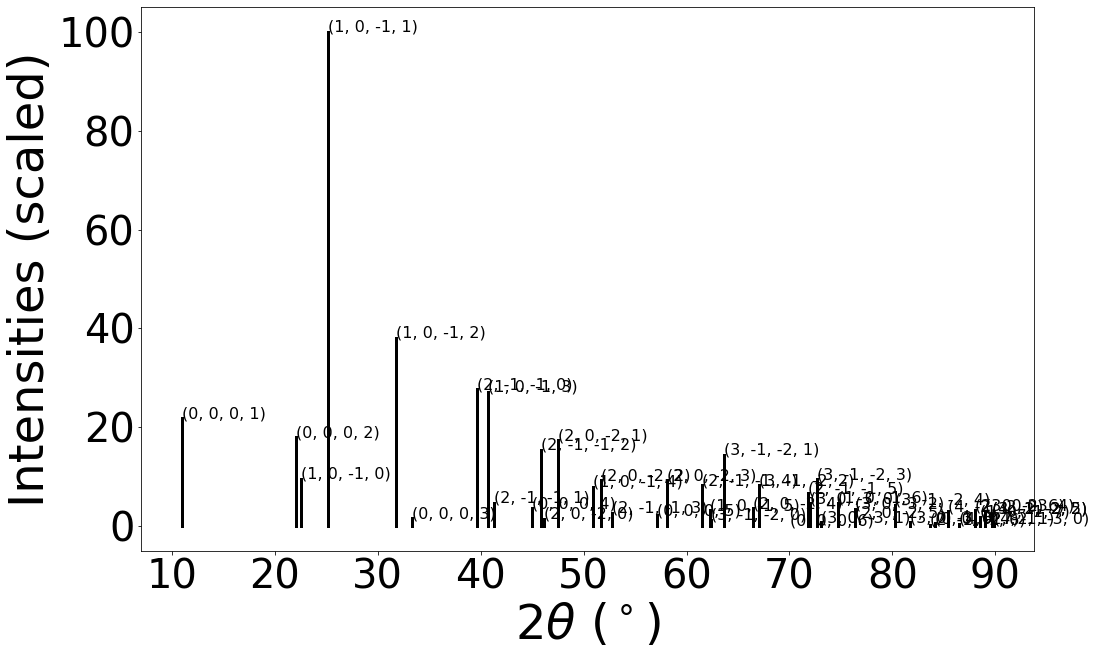

In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import HTML, display
import tabulate
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction import xrd
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
from pymatgen.analysis.diffraction.xrd import XRDCalculator
with MPRester("B6FsiVusbpLKdMu3") as m: 
    structurr = m.get_structure_by_material_id("mp-30031")
    w = CifWriter(structurr)
    w.write_file('mp30031.cif')
    
# Object XRDCalculator    
xrdc = XRDCalculator(wavelength='CuKa', symprec = 0, debye_waller_factors=None)
xrdc.get_plot(structurr)

# Récupération des données de xrdc
xrdp = xrdc.get_pattern(structure = structurr, scaled = True, two_theta_range = (0,90))


# Affichage des données
table = [["(h,k,l)",r'$2\theta$',"Amplitude"],[(xrdp.hkls)[0],(xrdp.x)[0],(xrdp.y)[0]],[(xrdp.hkls)[1],(xrdp.x)[1],(xrdp.y)[1]],[(xrdp.hkls)[2],(xrdp.x)[2],(xrdp.y)[2]]]
display(HTML(tabulate.tabulate(table,tablefmt = 'html')))